In [87]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from utilities import deets
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Result Anaysis

## Import 

In [180]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
import numpy as np 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [181]:
df = pd.read_csv(
    '../../not_on_git/final_classification/all_classified.csv' , 
    usecols=['name'  , 'ra' ,'dec' ,'prob', 'class' , 'prob_margin' , 'prob_AGN' , 'prob_STAR' , 'prob_YSO' , 'prob_HMXB' , 'prob_ULX' , 'prob_LMXB' , 'prob_CV' , 'prob_PULSAR' ] , 
    index_col='name')
df 

,ra,dec,class,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,STAR,0.777433,0.638933,0.055179,0.138500,0.010542,0.000267,0.012819,0.777433,0.004473,0.000788
2CXO J003936.7-731249,9.903193,-73.213742,PULSAR,0.608646,0.451597,0.135585,0.084166,0.007442,0.002624,0.608646,0.157049,0.002616,0.001873
2CXO J004028.7-731106,10.119748,-73.185171,AGN,0.446212,0.092019,0.446212,0.088609,0.037777,0.003872,0.048872,0.354193,0.017957,0.002509
2CXO J004506.3-730056,11.276413,-73.015666,PULSAR,0.598368,0.283901,0.021978,0.314468,0.003833,0.000158,0.598368,0.058450,0.002176,0.000569
2CXO J004659.0-731918,11.745895,-73.321890,STAR,0.821817,0.718309,0.032379,0.005989,0.103508,0.000253,0.031668,0.821817,0.003821,0.000564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,331.138121,-49.987838,HMXB,0.671695,0.438401,0.032561,0.233294,0.671695,0.000025,0.000336,0.007829,0.054160,0.000100
2CXO J220508.3-495935,331.284642,-49.993301,HMXB,0.913425,0.850303,0.017150,0.063122,0.913425,0.000210,0.000860,0.001775,0.003403,0.000054
2CXO J220544.0-495505,331.433541,-49.918280,HMXB,0.801407,0.710030,0.089127,0.091377,0.801407,0.000579,0.000613,0.013682,0.003008,0.000208


## Result data analysis

In [182]:
from utilities import deets

In [183]:
labels = ['AGN' , 'STAR' , 'YSO' , 'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']

#### Probability distribution

##### Using histogram

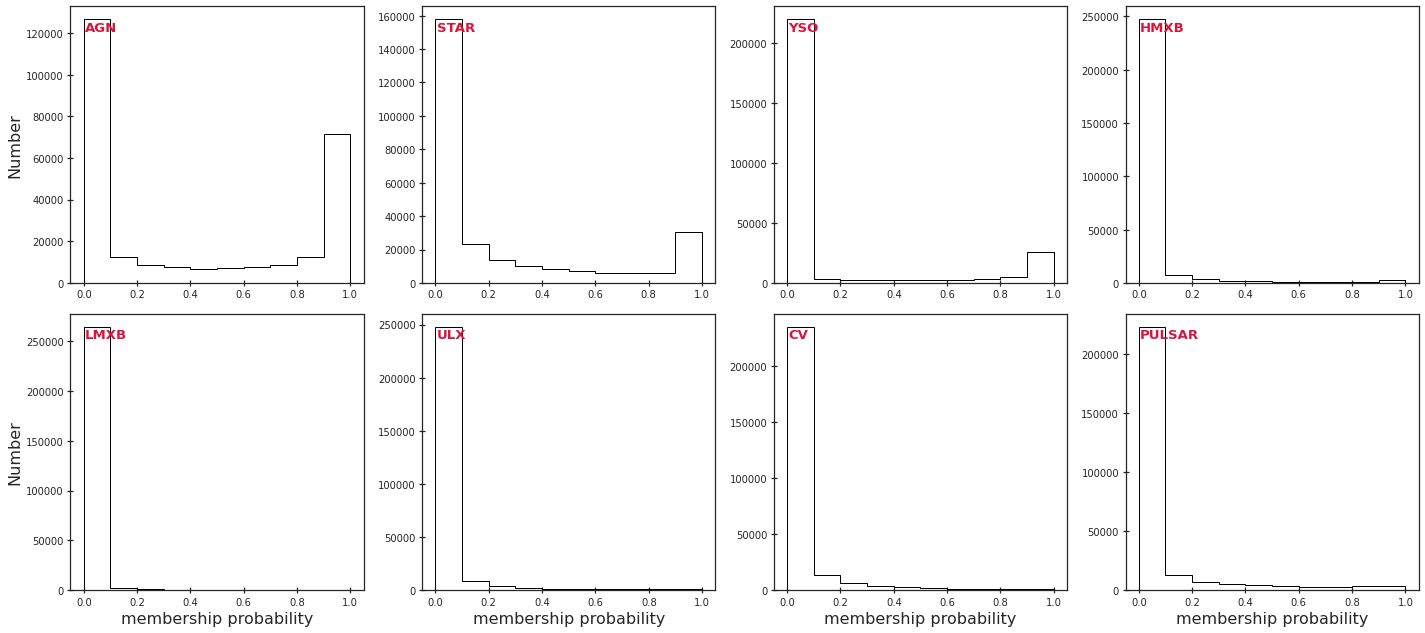

In [184]:
from utilities import set_plot
set_plot(font_size=1.1)
fig,ax = plt.subplots(nrows=2 , ncols=4 , figsize=(20,9))
for c , a in zip(labels, ax.ravel()):
    a.hist(df[f'prob_{c}'] , density=False , label = c , histtype ='step' , color='black'  , ec = 'black', linewidth = 1)
    a.text(0.05,0.91 , c , transform=a.transAxes , color='crimson' , fontweight='bold')
    a.tick_params(which='both' , direction='inout' , labelsize=10)
    #a.legend(loc='upper left')
for a in ax.ravel()[4:]:
    a.set_xlabel('membership probability' , fontsize=16)
ax[0][0].set_ylabel('Number' , fontsize=16)
ax[1][0].set_ylabel('Number' , fontsize=16)
plt.tight_layout()
plt.savefig('result/plots/probability_membership_plots.eps')
plt.show()


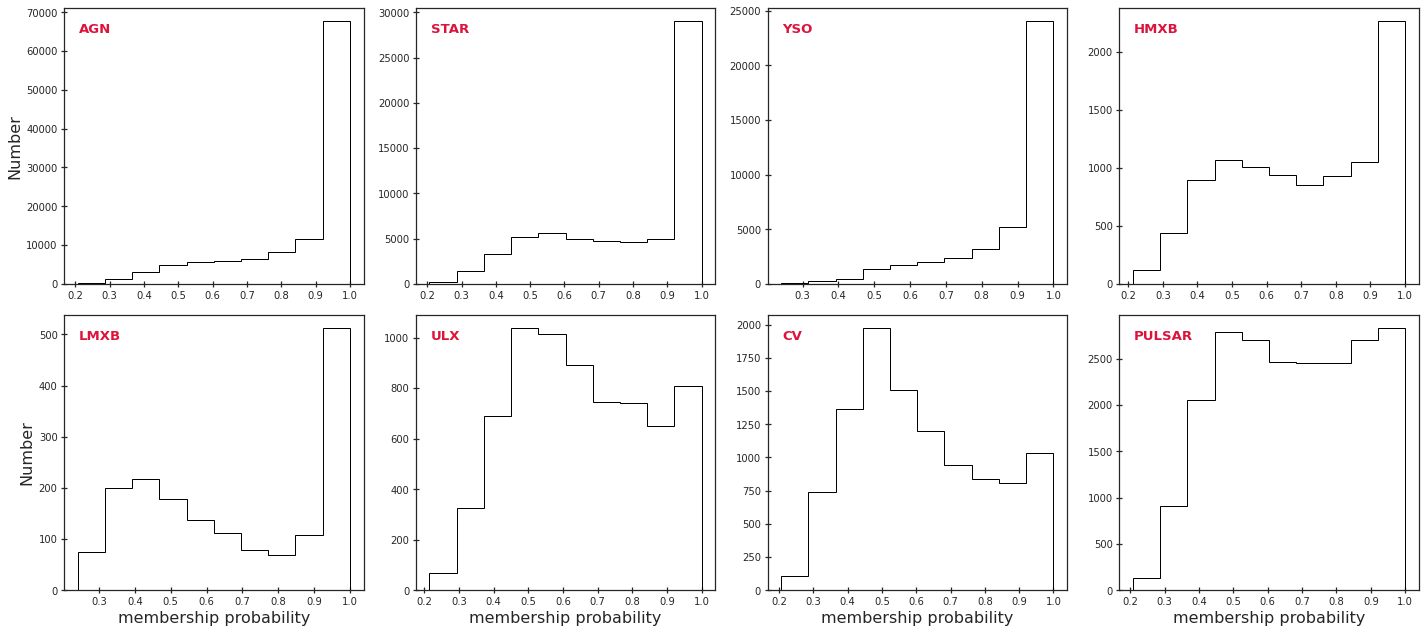

In [185]:
from utilities import set_plot
set_plot(font_size=1.1)
fig,ax = plt.subplots(nrows=2 , ncols=4 , figsize=(20,9))
for c , a in zip(labels, ax.ravel()):
    a.hist(df[df['class']==c]['prob'] , density=False , label = c , histtype ='step' , color='black'  , ec = 'black', linewidth = 1)
    a.text(0.05,0.91 , c , transform=a.transAxes , color='crimson' , fontweight='bold')
    a.tick_params(which='both' , direction='inout' , labelsize=10)
    #a.legend(loc='upper left')
for a in ax.ravel()[4:]:
    a.set_xlabel('membership probability' , fontsize=16)
ax[0][0].set_ylabel('Number' , fontsize=16)
ax[1][0].set_ylabel('Number' , fontsize=16)
plt.savefig('result/plots/probability_plots.eps')
plt.tight_layout()
plt.show()


##### Using KDE

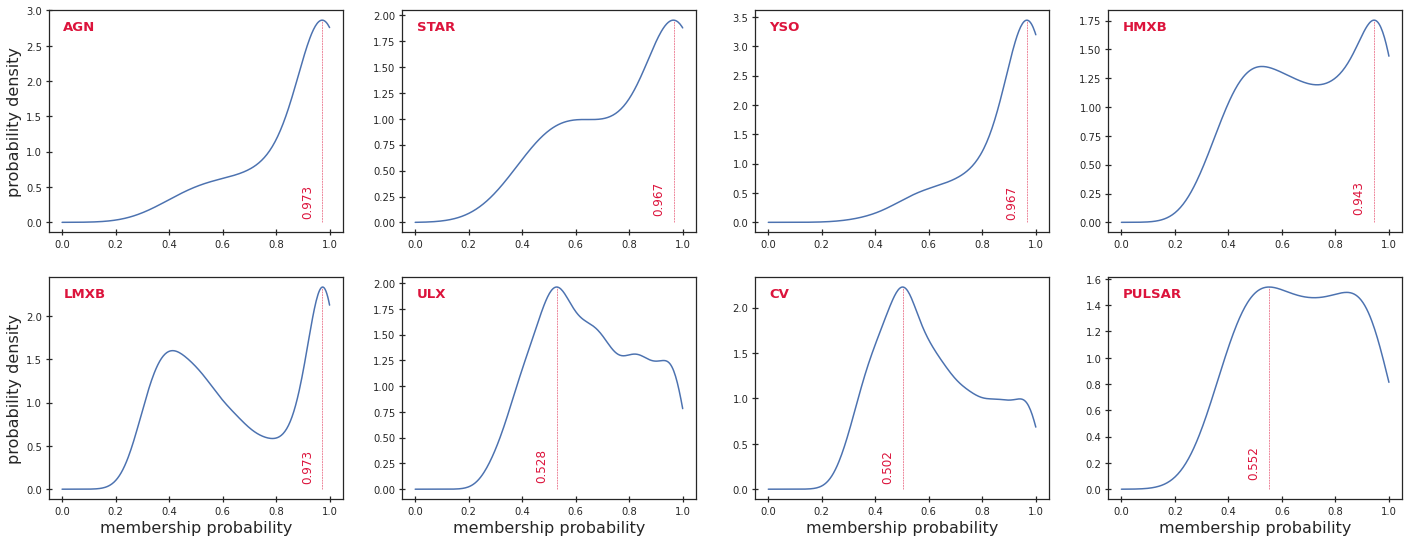

In [150]:
from utilities import set_plot
set_plot(font_size=1.1)
fig,ax = plt.subplots(nrows=2 , ncols=4 , figsize=(20,9))
mode_all = []
labels = ['AGN' , 'STAR' , 'YSO' , 'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
bw = [0.5 , 0.5 , 0.5 , 0.3 , 0.2 , 0.2 , 0.2 , 0.4]
for c , a ,  b in zip(labels, ax.ravel() , bw):
    kde = gaussian_kde(df[df['class']==c]['prob'] , bw_method = b)
    prob_x =  np.linspace(0,1 , num=300)
    pdf = kde.evaluate(prob_x)
    mode = prob_x[np.argmax(pdf)]
    a.plot(prob_x , pdf)
    a.vlines(mode , np.amin(pdf) , np.amax(pdf) , linestyles='--' , colors='crimson' , linewidth= 0.5)
    a.text(mode-0.08,0.1 , f'{mode:.3f}', color='crimson' , fontweight='normal' , size=12 , rotation ='vertical')
    #a.hist(df[df['class']==c]['prob'] , density=True , label = c , histtype ='step' , color='black'  , ec = 'black', linewidth = 1)
    a.text(0.05,0.91 , c , transform=a.transAxes , color='crimson' , fontweight='bold')
    a.tick_params(which='both' , direction='inout' , labelsize=10)
    #a.legend(loc='upper left')
for a in ax.ravel()[4:]:
    a.set_xlabel('membership probability' , fontsize=16)
ax[0][0].set_ylabel('probability density' , fontsize=16)
ax[1][0].set_ylabel('probability density' , fontsize=16)
fig.subplots_adjust(left=0.04 , right=0.98)
plt.savefig('result/plots/probability_plots_density.eps')
plt.show()


#### KDE for finding max-probable CMP

In [84]:
from scipy.stats import gaussian_kde

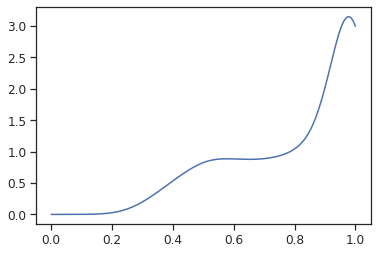

In [106]:
kde = gaussian_kde(df['prob'] , bw_method = 0.3)
prob_x =  np.linspace(0,1 , num=200)
pdf = kde.evaluate(prob_x)
plt.plot(prob_x , pdf)
plt.show()

In [107]:
prob_x[np.argmax(pdf)]

0.9798994974874372

# Feature Importance

## Imports and functions

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
import lightgbm as lgb 
%load_ext autoreload
%autoreload 2

In [2]:
from choices import param_dict 
from utilities import deets

In [3]:
from utilities import make_model

In [4]:
class feat_test_mdoel(make_model):
    def __init__(self , name , clf , gamma ,x ,y , train_data_loc):
        self.features = x.columns.to_list() 
        self.train_data_loc = train_data_loc
        make_model.__init__(self , name , clf , gamma , x ,y)

In [5]:
def load_data(feat_to_drop):
    x = pd.read_csv('../compiled_data_v3/x_phot_minmax.csv' , index_col='name')
    x_col = x.columns.to_list()
    #print(x_col)
    i = pd.read_csv('../compiled_data_v3/id_frame.csv' , index_col='name')
    df = pd.merge(i,x , left_index =True , right_index =True )
    df = df[df['offset']<1.01]
    classes = ['AGN' ,'STAR' ,'YSO' ,'HMXB' , 'LMXB' , 'ULX' ,'CV' , 'PULSAR']
    df = df[df['class'].isin(classes)]
    #from sklearn.preprocessing import LabelEncoder
    #y_int = LabelEncoder().fit_transform(df['class'])
    x = df[x_col]
    x = x.drop(columns=feat_to_drop)
    x.columns = x.columns.str.replace(' ' ,'_' , regex=False)
    y = df['class']
    deets(x)
    return x,y 


In [6]:
from utilities import simple_cv

def calc_weight(gamma , y):
    l = len(y)
    cl_weight = {}
    cl_dict = y.value_counts().to_dict()
    for cl , val in zip(cl_dict.keys() , cl_dict.values()):
        w = np.exp((l / val)*gamma)
        cl_weight[cl] = w
    #print(cl_weight)
    return cl_weight
gamma = 0.07

In [7]:
base_feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC']+[
    '0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc' , 
]+['var_inter_hard_prob_hs', 'ks_intra_prob_b', 'var_inter_hard_sigma_hm', 'var_inter_hard_prob_ms', 'var_inter_hard_prob_hm',] )

## Drop features and test

### Base features

In [8]:
feat_to_drop = base_feat_to_drop
x , y = load_data(feat_to_drop)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
_____________________________________________________


In [14]:
y_dict = y.value_counts().to_dict()

In [30]:
pie_values = np.asarray(list(y_dict.values()))
pie_values

array([2790, 2395, 1149,  748,  211,  166,  143,  101])

In [56]:
explode = np.asarray([1,1,1,2,3,5,5,5])
explode = np.asarray([1,1,1,1,1,1,1,1])

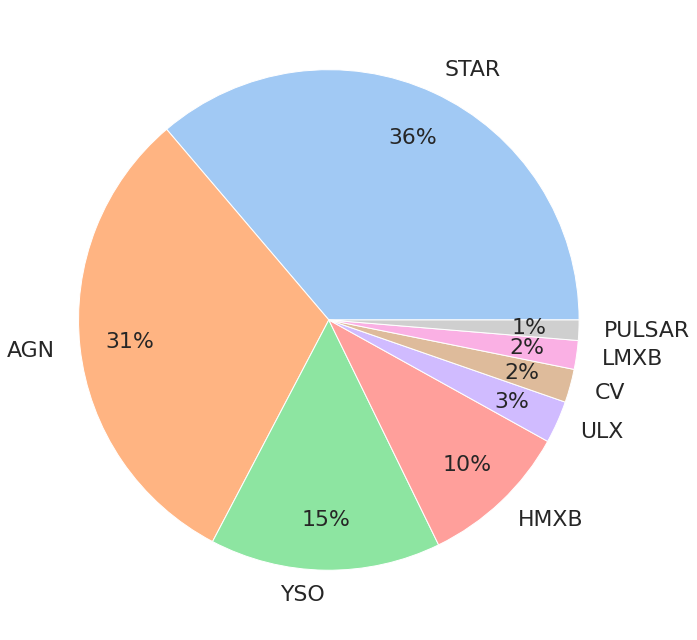

In [86]:
colors = sns.color_palette('pastel')[:]
from utilities import set_plot
set_plot(font_size=1.6)
plt.figure(figsize=(10,10))
plt.pie(pie_values, labels = y_dict.keys(),  colors = colors, autopct='%.0f%%' , explode = explode*0, pctdistance=0.8 , textprops={'size':22})
plt.tight_layout()
plt.savefig('images/train_pie.eps' , format='eps')
plt.show()

In [9]:
x

,gal_b2,gal_l2,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,h-csc,b-csc,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,2.487849,8.497420,2.632625,0.000904,5.046627,0.00,8.195828,1.0,1.499984e-09,0.000345,...,4.784757,2.894845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,4.327881,9.393618,9.999996,0.017956,1.995495,10.00,8.236122,0.0,1.102579e-07,0.054905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,2.488746,8.496825,9.999844,0.001090,6.298061,7.50,8.909807,1.0,8.495617e-10,0.001753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,2.489281,8.496673,8.302307,0.026969,8.383567,6.25,9.841010,2.0,9.022461e-10,0.004952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,2.487878,8.497314,5.005657,0.000442,7.272317,3.75,9.850364,2.0,1.416053e-09,0.000386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J003444.5-431554,0.888957,8.713766,NaN,NaN,3.074255,NaN,0.408315,0.0,NaN,0.010893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J203606.3+422737,5.054270,2.262789,NaN,NaN,3.363494,NaN,8.996703,0.0,NaN,0.006719,...,7.935403,4.953001,7.119828,NaN,6.445148,NaN,6.807378,5.048179,NaN,NaN
2CXO J131747.5+411745,9.176328,2.880393,NaN,NaN,1.768983,NaN,2.472603,0.0,9.654383e-08,0.044660,...,8.002279,2.122574,NaN,5.055027,NaN,4.955872,NaN,NaN,NaN,6.731328


In [258]:
for i in range(1,4):
    print(i,'----------------------------------------------------------------------------')
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , num_class=len(np.unique(y)) ,force_col_wise=True , random_state = np.random.randint(1))
    model = feat_test_mdoel('lightGBM' , clf ,gamma , x,y ,'../compiled_data_v3/x_phot_minmax.csv' )
    model.validate(k=20)
    model.x = 'not_saved'
    model.y = 'not_saved'
    model.save(f'models/all_feat_v1_{i}.pkl' , compress=4)

1 ----------------------------------------------------------------------------
>>> GOING for 1 / 20 Iteration FOLD
>>> GOING for 2 / 20 Iteration FOLD
>>> GOING for 3 / 20 Iteration FOLD
>>> GOING for 4 / 20 Iteration FOLD
>>> GOING for 5 / 20 Iteration FOLD
>>> GOING for 6 / 20 Iteration FOLD
>>> GOING for 7 / 20 Iteration FOLD
>>> GOING for 8 / 20 Iteration FOLD
>>> GOING for 9 / 20 Iteration FOLD
>>> GOING for 10 / 20 Iteration FOLD
>>> GOING for 11 / 20 Iteration FOLD
>>> GOING for 12 / 20 Iteration FOLD
>>> GOING for 13 / 20 Iteration FOLD
>>> GOING for 14 / 20 Iteration FOLD
>>> GOING for 15 / 20 Iteration FOLD
>>> GOING for 16 / 20 Iteration FOLD
>>> GOING for 17 / 20 Iteration FOLD
>>> GOING for 18 / 20 Iteration FOLD
>>> GOING for 19 / 20 Iteration FOLD
>>> GOING for 20 / 20 Iteration FOLD
| class   |   recall_score |   precision_score |   f1_score |
|:--------|---------------:|------------------:|-----------:|
| AGN     |       0.977871 |          0.970978 |   0.974412 |
| CV

### Drop galactic coordinates

In [259]:
feat_to_drop = list(base_feat_to_drop) + ['gal_l2' , 'gal_b2']
x , y = load_data(feat_to_drop)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 39
_____________________________________________________


In [261]:
for i in range(5):
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , num_class=len(np.unique(y)) ,force_col_wise=True , random_state = np.random.randint(1))
    model = feat_test_mdoel('lightGBM' , clf ,gamma , x,y ,'../compiled_data_v3/x_phot_minmax.csv' )
    model.validate(k=20)
    model.x = 'not_saved'
    model.y = 'not_saved'
    model.save(f'models/no_gal_coord_{i}.pkl' , compress=4)

>>> GOING for 1 / 20 Iteration FOLD
>>> GOING for 2 / 20 Iteration FOLD
>>> GOING for 3 / 20 Iteration FOLD
>>> GOING for 4 / 20 Iteration FOLD
>>> GOING for 5 / 20 Iteration FOLD
>>> GOING for 6 / 20 Iteration FOLD
>>> GOING for 7 / 20 Iteration FOLD
>>> GOING for 8 / 20 Iteration FOLD
>>> GOING for 9 / 20 Iteration FOLD
>>> GOING for 10 / 20 Iteration FOLD
>>> GOING for 11 / 20 Iteration FOLD
>>> GOING for 12 / 20 Iteration FOLD
>>> GOING for 13 / 20 Iteration FOLD
>>> GOING for 14 / 20 Iteration FOLD
>>> GOING for 15 / 20 Iteration FOLD
>>> GOING for 16 / 20 Iteration FOLD
>>> GOING for 17 / 20 Iteration FOLD
>>> GOING for 18 / 20 Iteration FOLD
>>> GOING for 19 / 20 Iteration FOLD
>>> GOING for 20 / 20 Iteration FOLD
| class   |   recall_score |   precision_score |   f1_score |
|:--------|---------------:|------------------:|-----------:|
| AGN     |       0.930689 |          0.937342 |   0.934004 |
| CV      |       0.331325 |          0.443548 |   0.37931  |
| HMXB    |       0.6

### Drop color features

In [262]:
feat_to_drop = list(base_feat_to_drop) + ['B-R', 'G-J', 'G-W2', 'Bp-H', 'Bp-W3', 'Rp-K', 'J-H', 'J-W1', 'W1-W2']
x , y = load_data(feat_to_drop)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 32
_____________________________________________________


In [263]:
for i in range(5):
    print('----------------------------------------------------------------------------')
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , num_class=len(np.unique(y)) ,force_col_wise=True , random_state = np.random.randint(1))
    model = feat_test_mdoel('lightGBM' , clf ,gamma , x,y ,'../compiled_data_v3/x_phot_minmax.csv' )
    model.validate(k=20)
    model.x = 'not_saved'
    model.y = 'not_saved'
    model.save(f'models/no_color_{i}.pkl' , compress=4)

----------------------------------------------------------------------------
>>> GOING for 1 / 20 Iteration FOLD
>>> GOING for 2 / 20 Iteration FOLD
>>> GOING for 3 / 20 Iteration FOLD
>>> GOING for 4 / 20 Iteration FOLD
>>> GOING for 5 / 20 Iteration FOLD
>>> GOING for 6 / 20 Iteration FOLD
>>> GOING for 7 / 20 Iteration FOLD
>>> GOING for 8 / 20 Iteration FOLD
>>> GOING for 9 / 20 Iteration FOLD
>>> GOING for 10 / 20 Iteration FOLD
>>> GOING for 11 / 20 Iteration FOLD
>>> GOING for 12 / 20 Iteration FOLD
>>> GOING for 13 / 20 Iteration FOLD
>>> GOING for 14 / 20 Iteration FOLD
>>> GOING for 15 / 20 Iteration FOLD
>>> GOING for 16 / 20 Iteration FOLD
>>> GOING for 17 / 20 Iteration FOLD
>>> GOING for 18 / 20 Iteration FOLD
>>> GOING for 19 / 20 Iteration FOLD
>>> GOING for 20 / 20 Iteration FOLD
| class   |   recall_score |   precision_score |   f1_score |
|:--------|---------------:|------------------:|-----------:|
| AGN     |       0.9762   |          0.966915 |   0.971535 |
| CV  

### Drop all MW features

In [264]:
feat_to_drop = list(base_feat_to_drop) + ['B-R', 'G-J', 'G-W2', 'Bp-H', 'Bp-W3', 'Rp-K', 'J-H', 'J-W1', 'W1-W2'] + ['FUV', 'NUV', 'u-sdss', 'g-sdss', 'r-sdss', 'i-sdss', 'z-sdss', 'W1', 'W2', 'W3', 'W4', '24 microns (MIPS)', 'J', 'H', 'K', 'G', 'Bp', 'Rp', 'B-R', 'G-J', 'G-W2', 'Bp-H', 'Bp-W3', 'Rp-K', 'J-H', 'J-W1', 'W1-W2']
x , y = load_data(feat_to_drop)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 14
_____________________________________________________


In [265]:
for i in range(5):
    print(i,'----------------------------------------------------------------------------')
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , num_class=len(np.unique(y)) ,force_col_wise=True , random_state = np.random.randint(1))
    model = feat_test_mdoel('lightGBM' , clf ,gamma , x,y ,'../compiled_data_v3/x_phot_minmax.csv' )
    model.validate(k=20)
    model.x = 'not_saved'
    model.y = 'not_saved'
    model.save(f'models/no_mw_{i}.pkl' , compress=4)

0 ----------------------------------------------------------------------------
>>> GOING for 1 / 20 Iteration FOLD
>>> GOING for 2 / 20 Iteration FOLD
>>> GOING for 3 / 20 Iteration FOLD
>>> GOING for 4 / 20 Iteration FOLD
>>> GOING for 5 / 20 Iteration FOLD
>>> GOING for 6 / 20 Iteration FOLD
>>> GOING for 7 / 20 Iteration FOLD
>>> GOING for 8 / 20 Iteration FOLD
>>> GOING for 9 / 20 Iteration FOLD
>>> GOING for 10 / 20 Iteration FOLD
>>> GOING for 11 / 20 Iteration FOLD
>>> GOING for 12 / 20 Iteration FOLD
>>> GOING for 13 / 20 Iteration FOLD
>>> GOING for 14 / 20 Iteration FOLD
>>> GOING for 15 / 20 Iteration FOLD
>>> GOING for 16 / 20 Iteration FOLD
>>> GOING for 17 / 20 Iteration FOLD
>>> GOING for 18 / 20 Iteration FOLD
>>> GOING for 19 / 20 Iteration FOLD
>>> GOING for 20 / 20 Iteration FOLD
| class   |   recall_score |   precision_score |   f1_score |
|:--------|---------------:|------------------:|-----------:|
| AGN     |       0.951566 |          0.912695 |   0.931725 |
| CV

### Drop IR features

In [266]:
feat_to_drop = list(base_feat_to_drop)  + ['W1', 'W2', 'W3', 'W4', '24 microns (MIPS)', 'J', 'H', 'K','G-J','G-W2', 'Bp-H', 'Bp-W3', 'Rp-K', 'J-H', 'J-W1', 'W1-W2']
x , y = load_data(feat_to_drop)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 25
_____________________________________________________


In [267]:
for i in range(5):
    print(i,'----------------------------------------------------------------------------')
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , num_class=len(np.unique(y)) ,force_col_wise=True , random_state = np.random.randint(1))
    model = feat_test_mdoel('lightGBM' , clf ,gamma , x,y ,'../compiled_data_v3/x_phot_minmax.csv' )
    model.validate(k=20)
    model.x = 'not_saved'
    model.y = 'not_saved'
    model.save(f'models/no_IR_{i}.pkl' , compress=4)

0 ----------------------------------------------------------------------------
>>> GOING for 1 / 20 Iteration FOLD
>>> GOING for 2 / 20 Iteration FOLD
>>> GOING for 3 / 20 Iteration FOLD
>>> GOING for 4 / 20 Iteration FOLD
>>> GOING for 5 / 20 Iteration FOLD
>>> GOING for 6 / 20 Iteration FOLD
>>> GOING for 7 / 20 Iteration FOLD
>>> GOING for 8 / 20 Iteration FOLD
>>> GOING for 9 / 20 Iteration FOLD
>>> GOING for 10 / 20 Iteration FOLD
>>> GOING for 11 / 20 Iteration FOLD
>>> GOING for 12 / 20 Iteration FOLD
>>> GOING for 13 / 20 Iteration FOLD
>>> GOING for 14 / 20 Iteration FOLD
>>> GOING for 15 / 20 Iteration FOLD
>>> GOING for 16 / 20 Iteration FOLD
>>> GOING for 17 / 20 Iteration FOLD
>>> GOING for 18 / 20 Iteration FOLD
>>> GOING for 19 / 20 Iteration FOLD
>>> GOING for 20 / 20 Iteration FOLD
| class   |   recall_score |   precision_score |   f1_score |
|:--------|---------------:|------------------:|-----------:|
| AGN     |       0.969102 |          0.947734 |   0.958299 |
| CV

### Dropping Optical/UV features

In [268]:
feat_to_drop = list(base_feat_to_drop) +['FUV', 'NUV', 'u-sdss', 'g-sdss', 'r-sdss', 'i-sdss', 'z-sdss', 'G', 'Bp', 'Rp', 'B-R', 'G-J', 'G-W2', 'Bp-H', 'Bp-W3', 'Rp-K',]
x , y = load_data(feat_to_drop)

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 25
_____________________________________________________


In [269]:
for i in range(5):
    print(i,'----------------------------------------------------------------------------')
    cl_weight = calc_weight(gamma , y)
    clf = lgb.LGBMClassifier(n_estimators = 100 ,class_weight = cl_weight , objective= 'multiclass', sparse=True , is_unbalance=True , metric=['auc_mu'] ,verbosity = 0 , num_class=len(np.unique(y)) ,force_col_wise=True , random_state = np.random.randint(1))
    model = feat_test_mdoel('lightGBM' , clf ,gamma , x,y ,'../compiled_data_v3/x_phot_minmax.csv' )
    model.validate(k=20)
    model.x = 'not_saved'
    model.y = 'not_saved'
    model.save(f'models/no_optical_uv_{i}.pkl' , compress=4)

0 ----------------------------------------------------------------------------
>>> GOING for 1 / 20 Iteration FOLD
>>> GOING for 2 / 20 Iteration FOLD
>>> GOING for 3 / 20 Iteration FOLD
>>> GOING for 4 / 20 Iteration FOLD
>>> GOING for 5 / 20 Iteration FOLD
>>> GOING for 6 / 20 Iteration FOLD
>>> GOING for 7 / 20 Iteration FOLD
>>> GOING for 8 / 20 Iteration FOLD
>>> GOING for 9 / 20 Iteration FOLD
>>> GOING for 10 / 20 Iteration FOLD
>>> GOING for 11 / 20 Iteration FOLD
>>> GOING for 12 / 20 Iteration FOLD
>>> GOING for 13 / 20 Iteration FOLD
>>> GOING for 14 / 20 Iteration FOLD
>>> GOING for 15 / 20 Iteration FOLD
>>> GOING for 16 / 20 Iteration FOLD
>>> GOING for 17 / 20 Iteration FOLD
>>> GOING for 18 / 20 Iteration FOLD
>>> GOING for 19 / 20 Iteration FOLD
>>> GOING for 20 / 20 Iteration FOLD
| class   |   recall_score |   precision_score |   f1_score |
|:--------|---------------:|------------------:|-----------:|
| AGN     |       0.962839 |          0.959634 |   0.961234 |
| CV

# Feature Distributions

In [6]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
df_new = pd.read_csv('../../not_on_git/final_classification/all_classified.csv' , usecols=['name' , 'class' , 'prob'] , index_col='name')
df_new = df_new[df_new['class']=='ULX']
df_new = df_new[df_new['prob']>0.5].drop(columns=['prob'])
#len(df_new)
#from utilities import deets
deets(df_new , 1)

_____________________________________________________
------------------------------
Number of Objects : 5286
Number of Columns : 1
------------------------------


ULX    5286
Name: class, dtype: int64

_____________________________________________________


In [108]:
print(df.columns.to_list())

['gal_l', 'gal_b', 'var_flag', 'b-csc', 'h-csc', 'm-csc', 's-csc', 'u-csc', 'hard_hm', 'hard_hs', 'hard_ms', 'var_intra_index_b', 'var_intra_prob_b', 'ks_intra_prob_b', 'kp_intra_prob_b', 'var_inter_index_b', 'var_inter_prob_b', 'var_inter_sigma_b', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag', 'fuv_mag', 'nuv_mag', 'g_mag', 'bp_mag', 'rp_mag', 'bp-R', 'g-J', 'g-W2', 'bp-H', 'bp-W3', 'rp-K', 'J-H', 'J-W1', 'W1-W2', 'u-g', 'g-r', 'r-z', 'i-z', 'u-z']


In [102]:
from utilities import get_true_data
df = pd.read_csv('../../not_on_git/final_classification/train_data.csv' , usecols = ['name' , 'class'] , index_col='name')
df = df[df['class'].isin(['ULX'])]
#df = pd.concat([df ,df_new ])
df = get_true_data(df).drop(columns=['class'])
deets(df)

_____________________________________________________
------------------------------
Number of Objects : 211
Number of Columns : 49
_____________________________________________________


In [111]:
plot_feat = ['W1mag' , 'W1-W2' , 'hard_hs' , 'hard_hm']
#fig , ax = plt.subplots(nrows=2, ncols=2 , figsize=(10,8))
for c in (df.columns.to_list()):
    to_plot = df.copy()
    if(c=='hard_hm' or c=='hard_ms' or c=='hard_hs'):
        to_plot = to_plot[to_plot[c]>-0.9]
        to_plot = to_plot[to_plot[c]<0.9]
    plt.hist(to_plot[c],density=False, histtype='step')
    plt.savefig(f'temp_files/ulx_{c}.jpg')
#plt.show()
    plt.close()

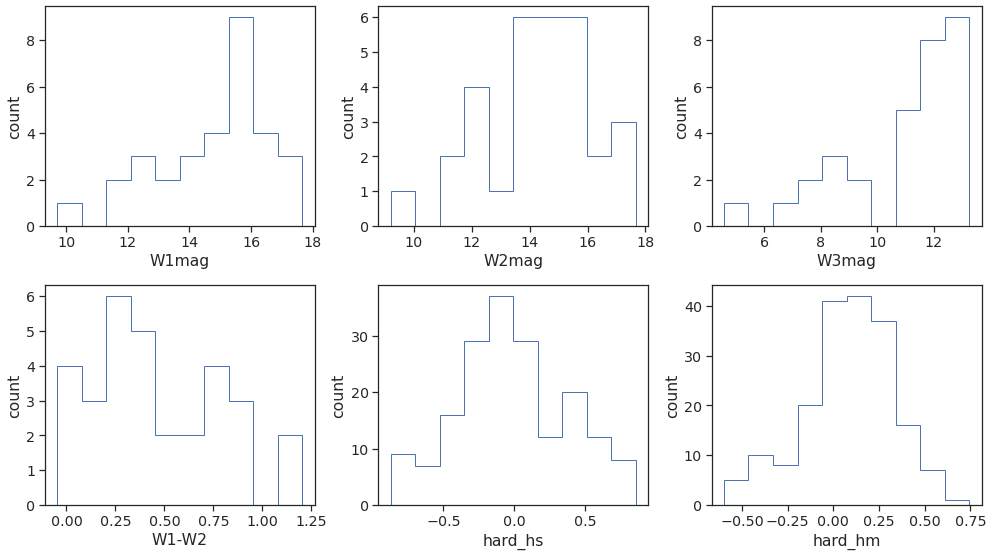

In [121]:
plot_feat = ['W1mag' , 'W2mag' , 'W3mag' , 'W1-W2' , 'hard_hs' , 'hard_hm']
fig , ax = plt.subplots(nrows=2, ncols=3 , figsize=(14,8))
for c , a in zip(plot_feat , np.ravel(ax)):
    to_plot = df.copy()
    if(c=='hard_hm' or c=='hard_ms' or c=='hard_hs'):
        to_plot = to_plot[to_plot[c]>-0.9]
        to_plot = to_plot[to_plot[c]<0.9]
    a.hist(to_plot[c],density=False, histtype='step' ,bins=10)
    a.set_xlabel(c)
    a.set_ylabel('count')
    # plt.savefig(f'temp_files/ulx_{c}.jpg')
plt.tight_layout()
plt.show()
plt.close()

# Source Counts

_____________________________________________________
------------------------------
Number of Objects : 269366
Number of Columns : 1
_____________________________________________________


In [14]:
df_train = pd.read_csv('../../not_on_git/final_classification/train_data.csv' , usecols = ['name' , 'class'] , index_col='name')
df_train

,class
name,
2CXO J002359.4-720438,CV
2CXO J174041.4-534004,CV
2CXO J002409.2-720543,CV
2CXO J002411.1-720620,CV
2CXO J002401.4-720441,CV
...,...
2CXO J003444.5-431554,AGN
2CXO J203606.3+422737,YSO
2CXO J131747.5+411745,AGN


In [15]:
df_all = pd.read_csv('../../not_on_git/final_classification/all_classified.csv' , usecols = ['name' , 'class'] , index_col='name')
deets(df_all)
df_all = pd.concat([df_train , df_all])
df_all

_____________________________________________________
------------------------------
Number of Objects : 269366
Number of Columns : 1
_____________________________________________________


,class
name,
2CXO J002359.4-720438,CV
2CXO J174041.4-534004,CV
2CXO J002409.2-720543,CV
2CXO J002411.1-720620,CV
2CXO J002401.4-720441,CV
...,...
2CXO J220433.1-495916,HMXB
2CXO J220508.3-495935,HMXB
2CXO J220544.0-495505,HMXB


In [39]:
flags = pd.read_csv('../flags/chandra_all_flags.csv' , index_col='name')
flags

,ra,dec,conf_flag,significance,extent_flag,sat_src_flag,gal_l,gal_b,var_flag,pileup_flag,streak_src_flag
name,,,,,,,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,0.0,3.294118,0,0.0,304.096050,-43.644346,0.0,0.0,0
2CXO J003936.7-731249,9.903193,-73.213742,0.0,4.157895,0,0.0,304.116127,-43.887309,0.0,0.0,0
2CXO J004028.7-731106,10.119748,-73.185171,0.0,14.422175,0,0.0,304.031850,-43.919668,0.0,0.0,0
2CXO J004501.0-730958,11.254322,-73.166239,0.0,15.667675,1,0.0,303.577560,-43.953962,0.0,0.0,0
2CXO J004506.3-730056,11.276413,-73.015666,0.0,10.447263,0,0.0,303.575841,-44.104667,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,331.557273,-49.957521,0.0,4.057143,0,0.0,345.582863,-51.190099,0.0,0.0,0
2CXO J220614.6-500951,331.560853,-50.164421,0.0,3.885714,0,0.0,345.272648,-51.119708,0.0,0.0,0
2CXO J220618.4-500554,331.577082,-50.098537,0.0,4.457143,0,0.0,345.365084,-51.152644,0.0,0.0,0


In [40]:
point_src = flags[flags['extent_flag']==0]
point_src

,ra,dec,conf_flag,significance,extent_flag,sat_src_flag,gal_l,gal_b,var_flag,pileup_flag,streak_src_flag
name,,,,,,,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,0.0,3.294118,0,0.0,304.096050,-43.644346,0.0,0.0,0
2CXO J003936.7-731249,9.903193,-73.213742,0.0,4.157895,0,0.0,304.116127,-43.887309,0.0,0.0,0
2CXO J004028.7-731106,10.119748,-73.185171,0.0,14.422175,0,0.0,304.031850,-43.919668,0.0,0.0,0
2CXO J004506.3-730056,11.276413,-73.015666,0.0,10.447263,0,0.0,303.575841,-44.104667,0.0,0.0,0
2CXO J004659.0-731918,11.745895,-73.321890,0.0,2.444444,0,0.0,303.374710,-43.802532,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,331.557273,-49.957521,0.0,4.057143,0,0.0,345.582863,-51.190099,0.0,0.0,0
2CXO J220614.6-500951,331.560853,-50.164421,0.0,3.885714,0,0.0,345.272648,-51.119708,0.0,0.0,0
2CXO J220618.4-500554,331.577082,-50.098537,0.0,4.457143,0,0.0,345.365084,-51.152644,0.0,0.0,0


In [12]:
good_src = point_src.query("conf_flag==0 and sat_src_flag==0 and pileup_flag==0 and streak_src_flag==0")
good_src

,ra,dec,conf_flag,significance,extent_flag,sat_src_flag,gal_l,gal_b,var_flag,pileup_flag,streak_src_flag
name,,,,,,,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,0.0,3.294118,0,0.0,304.096050,-43.644346,0.0,0.0,0
2CXO J003936.7-731249,9.903193,-73.213742,0.0,4.157895,0,0.0,304.116127,-43.887309,0.0,0.0,0
2CXO J004028.7-731106,10.119748,-73.185171,0.0,14.422175,0,0.0,304.031850,-43.919668,0.0,0.0,0
2CXO J004506.3-730056,11.276413,-73.015666,0.0,10.447263,0,0.0,303.575841,-44.104667,0.0,0.0,0
2CXO J004659.0-731918,11.745895,-73.321890,0.0,2.444444,0,0.0,303.374710,-43.802532,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,331.557273,-49.957521,0.0,4.057143,0,0.0,345.582863,-51.190099,0.0,0.0,0
2CXO J220614.6-500951,331.560853,-50.164421,0.0,3.885714,0,0.0,345.272648,-51.119708,0.0,0.0,0
2CXO J220618.4-500554,331.577082,-50.098537,0.0,4.457143,0,0.0,345.365084,-51.152644,0.0,0.0,0


In [16]:
print(len(good_src))
print(len(df_all))

277717
277069


In [21]:
df_missing_list = list(set(good_src.index.to_list()) - set(df_all.index.to_list()))
good_src.loc[df_missing_list]

,ra,dec,conf_flag,significance,extent_flag,sat_src_flag,gal_l,gal_b,var_flag,pileup_flag,streak_src_flag
name,,,,,,,,,,,
2CXO J103103.8+052359,157.766105,5.399731,0.0,3.818182,0,0.0,239.617516,50.163977,0.0,0.0,0
2CXO J103138.6+505134,157.910937,50.859446,0.0,1.897436,0,0.0,161.446121,54.501979,0.0,0.0,0
2CXO J103507.0-244147,158.779199,-24.696578,0.0,2.486486,0,0.0,267.479002,28.632915,0.0,0.0,0
2CXO J103429.5+213139,158.622969,21.527624,0.0,2.914286,0,0.0,215.567747,58.404612,0.0,0.0,0
2CXO J103936.7+430609,159.902928,43.102546,0.0,3.833333,0,0.0,173.315443,58.961409,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J103025.3+052711,157.605799,5.453217,0.0,3.176471,0,0.0,239.401344,50.068507,0.0,0.0,0
2CXO J103143.0-400955,157.929335,-40.165522,0.0,5.454545,0,0.0,275.958151,15.276897,0.0,0.0,0
2CXO J103906.6+051235,159.777514,5.209787,0.0,4.777778,0,0.0,241.799491,51.631658,0.0,0.0,0


In [24]:
from utilities import get_true_data
missing_data = get_true_data(good_src.loc[df_missing_list][[]])

In [26]:
print(missing_data.columns.to_list())

['gal_l', 'gal_b', 'var_flag', 'b-csc', 'h-csc', 'm-csc', 's-csc', 'u-csc', 'hard_hm', 'hard_hs', 'hard_ms', 'var_intra_index_b', 'var_intra_prob_b', 'ks_intra_prob_b', 'kp_intra_prob_b', 'var_inter_index_b', 'var_inter_prob_b', 'var_inter_sigma_b', 'umag', 'gmag', 'rmag', 'imag', 'zmag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag', 'fuv_mag', 'nuv_mag', 'g_mag', 'bp_mag', 'rp_mag', 'bp-R', 'g-J', 'g-W2', 'bp-H', 'bp-W3', 'rp-K', 'J-H', 'J-W1', 'W1-W2', 'u-g', 'g-r', 'r-z', 'i-z', 'u-z']


In [27]:
from utilities import make_model

In [28]:
import joblib 
model = joblib.load('models/lightGBM-final.pkl')
model

In [31]:
print(model.clf.feature_name_)

['gal_b2', 'gal_l2', 'var_inter_prob_b', 'var_inter_sigma_b', 'var_intra_prob_b', 'var_inter_index_b', 'kp_intra_prob_b', 'var_intra_index_b', 'h-csc', 'b-csc', 'm-csc', 's-csc', 'u-csc', '0p3_8_csc', 'FUV', 'NUV', 'u-sdss', 'g-sdss', 'r-sdss', 'i-sdss', 'z-sdss', 'W1', 'W2', 'W3', 'W4', '24_microns_(MIPS)', 'J', 'H', 'K', 'G', 'Bp', 'Rp', 'B-R', 'G-J', 'G-W2', 'Bp-H', 'Bp-W3', 'Rp-K', 'J-H', 'J-W1', 'W1-W2']


In [37]:
np.savetxt('temp_files/missing_sources.txt' , df_missing_list , fmt='%s')

# Probability Histogram

In [101]:
import joblib
gb = joblib.load('result/all_result/gb.pkl')['prob_table'][['true_class','pred_class','pred_prob']]
gb

,true_class,pred_class,pred_prob
name,,,
2CXO J053512.1-052433,STAR,STAR,0.976442
2CXO J174622.3-284440,STAR,STAR,0.942107
2CXO J053435.1-053432,STAR,STAR,0.993598
2CXO J180222.8-225935,YSO,YSO,0.989444
2CXO J104826.6-593020,STAR,STAR,0.989161
...,...,...,...
2CXO J064101.0+093452,STAR,STAR,0.980759
2CXO J010413.1-731905,STAR,STAR,0.994833
2CXO J053505.5-052752,STAR,STAR,0.995951


In [102]:
lgb = joblib.load('models/all_feat_v1_0.pkl').result['res_table'][['true_class' ,'pred_class' ,'pred_prob']]
lgb

,true_class,pred_class,pred_prob
name,,,
2CXO J085929.0-434904,YSO,YSO,0.999288
2CXO J104310.9-595123,YSO,YSO,0.998344
2CXO J034807.2+240830,STAR,STAR,0.999987
2CXO J144603.6-623209,STAR,STAR,0.999955
2CXO J053516.7-044544,STAR,STAR,0.999970
...,...,...,...
2CXO J180358.9-241817,STAR,YSO,0.999901
2CXO J171635.6+671625,AGN,AGN,0.848957
2CXO J015737.6+374900,STAR,STAR,0.999988


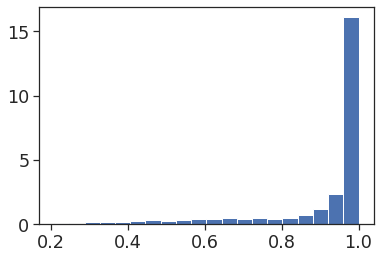

In [106]:
plt.hist(gb['pred_prob'] , bins=20, density=True)
plt.show()